In [25]:
import pandas as pd 
import matplotlib.pylab as plt 
import numpy as np 

In [11]:
car_df = pd.read_csv("data.csv",
                     #dtype_backend="pyarrow"
                     )
car_df.sample(5)

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
114005,114005,mercedes-benz,Mercedes-Benz E 300,grey,02/2014,2014,21999,185,252,Automatic,Petrol,"7,5 l/100 km",178 g/km,108000.0,CGI 4-Matic **2.HD/Comand/Ditr./Totw.**
188137,188137,seat,SEAT Arona,grey,03/2023,2023,21990,70,95,Manual,Petrol,"4,9 l/100 km",113 g/km,50.0,1.0 TSI Xperience 5-J-G LED NAVI PDC
132089,132089,mini,MINI Cooper S,grey,02/2020,2020,25790,141,192,Manual,Petrol,"6,4 l/100 km",147 g/km,24268.0,"JCW-Trim/17""/Navi//LED/PDC/Shz."
212108,212108,toyota,Toyota Corolla,brown,02/2023,2023,36660,144,196,Automatic,Hybrid,"5,4 l/100 km",123 g/km,100.0,2.0 Hybrid Team D LED Scheinwerfer Kamera SHZ ...
112717,112717,mercedes-benz,Mercedes-Benz C 200,grey,03/2013,2013,12500,100,136,Manual,Diesel,"4,8 l/100 km",- (g/km),169000.0,T CDI DPF (BlueEFFICIENCY) Avantgarde


In [122]:
# fix fuel
car_df["fuel_consumption"] = car_df["fuel_consumption_l_100km"].str.split(' ').str[0]
car_df["fuel_consumption"] = car_df["fuel_consumption"].str.replace(",",".").replace("-","").replace("\'\'","")
car_df["fuel_consumption"] = pd.to_numeric(car_df["fuel_consumption"] , errors='coerce')
car_df["fuel_consumption"].sample(5)
# fix price and devide by 1k euro
car_df["price"] = pd.to_numeric(car_df["price_in_euro"].str.extract('(\d+)', expand=False), errors='coerce')/ 1000
# fix milage
car_df["mileage_in_km"] = car_df["mileage_in_km"]/1000
# how old the car is in year from 2024 
car_df["registration_date"] =  pd.to_datetime(car_df["registration_date"] , errors="coerce")
car_df["old_yr"] = (2024 - car_df["registration_date"].dt.year)   - (car_df["registration_date"].dt.month / 12.0)   
# drop all data for older than 2014 and costliear than 60k 
car_df = car_df[ 
    (car_df["registration_date"] > "2014") & (car_df["price"] < 60 )
]

(0.0, 1000.0)

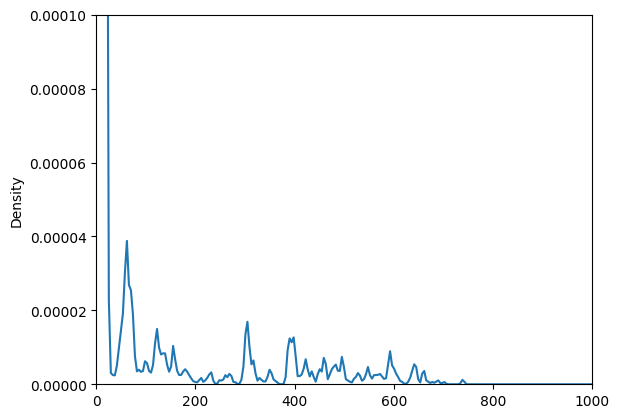

In [28]:
np.fabs(car_df["fuel_consumption"]).plot(kind="density")
plt.ylim(0.0,0.0001)
plt.xlim(0.0,1000)

<Axes: xlabel='year'>

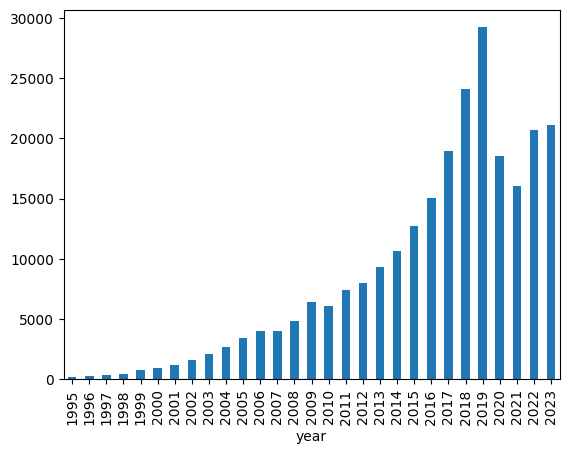

In [3]:
# Number of cars per year
by_year = car_df.year.value_counts(sort=False)
by_year[by_year > 100 ].plot(kind="bar")

<Axes: xlabel='model'>

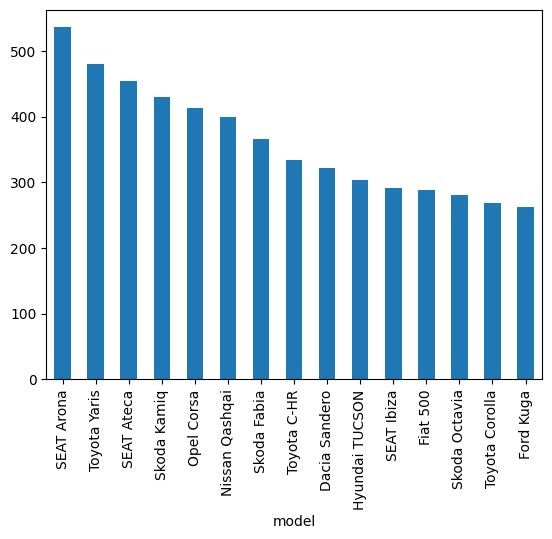

In [43]:
(car_df[car_df.year == "2023"].model.value_counts()[:15]).plot(kind="bar")

In [ ]:
top_10 = car_df[car_df.year == "2023"].model.value_counts()[:10].index

In [8]:
top_10

Index(['SEAT Arona', 'Toyota Yaris', 'SEAT Ateca', 'Skoda Kamiq', 'Opel Corsa',
       'Nissan Qashqai', 'Skoda Fabia', 'Toyota C-HR', 'Dacia Sandero',
       'Hyundai TUCSON'],
      dtype='string[pyarrow]', name='model')

Text(0, 0.5, 'price Distribution')

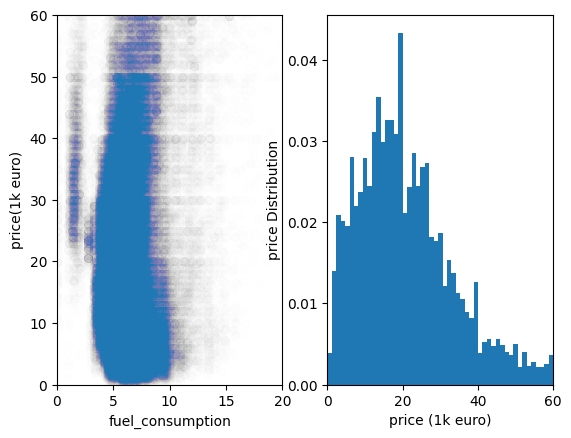

In [96]:
plt.subplot(121)
plt.plot((car_df["fuel_consumption"]),(car_df["price"]), "o" ,alpha=0.005)
plt.ylim(0,60)
plt.xlim(0,20)
plt.xlabel("fuel_consumption" )
plt.ylabel("price(1k euro)")
plt.subplot(122)
plt.hist(car_df["price"], density = True, bins = 5000 )
plt.xlim(0,60)
#plt.ylim(0,5e-5)
plt.xlabel("price (1k euro)")
plt.ylabel("price Distribution")

(0.0, 50.0)

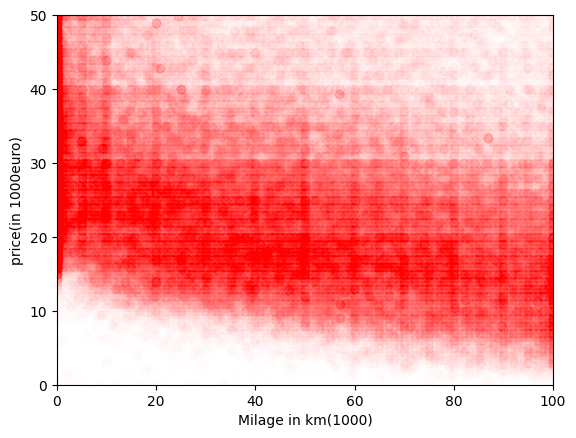

In [95]:
_ = plt.plot(car_df["mileage_in_km"]  
         , car_df["price"] , "or" , alpha=0.006 ) 
#plt.ylim(0,10000)
plt.xlabel("Milage in km(1000)")
plt.ylabel("price(in 1000euro)")
plt.xlim(0,1e2)
plt.ylim(0,50)


In [98]:
car_df["registration_date"].dtype

dtype('O')

(0.0, 50.0)

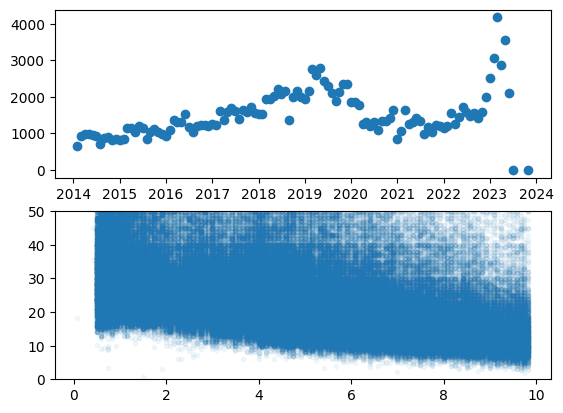

In [131]:
plt.subplot(211)
plt.plot(car_df[car_df["registration_date"] > "2000"]["registration_date"].value_counts() , "o" )
plt.subplot(212)

plt.plot(car_df["old_yr"], car_df["price"] , ".", alpha =0.05 )
plt.ylim(0,50)

(0.0, 50.0)

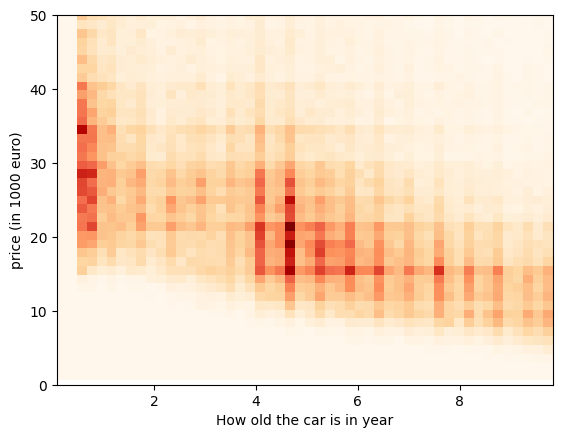

In [128]:
plt.hist2d(car_df["old_yr"], car_df["price"] ,
            bins = [50,50], cmap = "OrRd"
            ) 
plt.ylabel("price (in 1000 euro)")
plt.xlabel("How old the car is in year")
plt.ylim(0,50)

<Axes: xlabel='year,brand'>

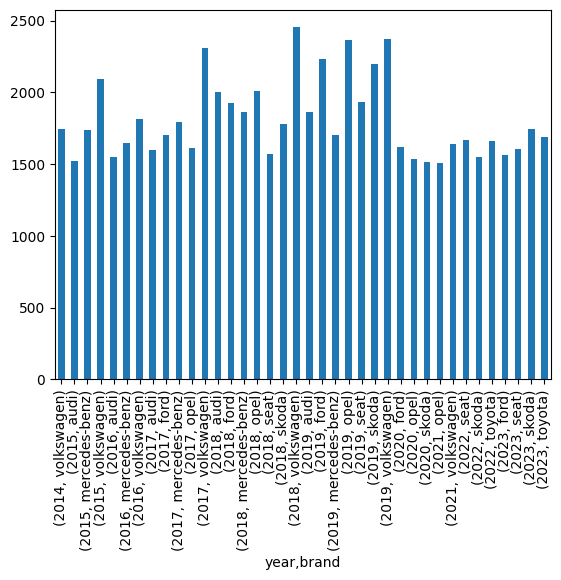

In [141]:
# car brand 
by_brand = car_df[["year","brand"]].value_counts(sort=False)
by_brand[by_brand > 1500].plot(kind="bar")